In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('profiles.csv')

In [3]:
from matplotlib import pyplot as plt

In [4]:
print(df.smokes.value_counts())
print(df.offspring.value_counts())

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64
doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and

In [5]:
#MLR: Can you predict offspring (y) from (smoking, drinking, and drugs)x
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)

smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "trying to quit": 3, "yes": 4}
df["smokes_code"] = df.smokes.map(smokes_mapping)

drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df['drugs_code'] = df.drugs.map(drugs_mapping)

offspring_maping = {"has kids, and wants more": 0, "has a kid, and wants more": 1, "has kids, and might want more": 2, "has a kid, and might want more": 3, 
                 "has a kid, but doesn&rsquo;t want more": 4, "has kids, but doesn&rsquo;t want more": 5,  "has a kid": 6, "has kids": 7,
                  "might want kids": 8, "wants kids": 9, "doesn&rsquo;t have kids, and doesn&rsquo;t want any": 10, "doesn&rsquo;t want kids": 11, 
                  "doesn&rsquo;t have kids, but wants them": 12, "doesn&rsquo;t have kids, but might want them": 13, "doesn&rsquo;t have kids": 14}
df["offspring_code"] = df.offspring.map(offspring_maping)

In [6]:
#from sklearn.preprocessing import MinMaxScaler
#feature_data = df[['smokes_code', 'drinks_code', 'drugs_code']]

#x = feature_data.values
#min_max_scaler = MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)


#feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

In [7]:
#fill in NaN
df.fillna({'smokes_code':0,
           'drinks_code':0,
           'drugs_code':0,
           'offspring_code':1
           },
          inplace=True)
df.isna().any()

age               False
body_type          True
diet               True
drinks             True
drugs              True
education          True
essay0             True
essay1             True
essay2             True
essay3             True
essay4             True
essay5             True
essay6             True
essay7             True
essay8             True
essay9             True
ethnicity          True
height             True
income            False
job                True
last_online       False
location          False
offspring          True
orientation       False
pets               True
religion           True
sex               False
sign               True
smokes             True
speaks             True
status            False
drinks_code       False
smokes_code       False
drugs_code        False
offspring_code    False
dtype: bool

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

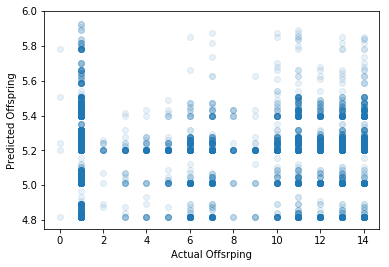

In [38]:
feature_data = df[['smokes_code', 'drugs_code', 'drinks_code']]
y = df[['offspring_code']]

X_train, X_test, y_train, y_test = train_test_split(feature_data, y, train_size = 0.8, test_size = 0.2, random_state=106)

model = LinearRegression()
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
plt.scatter(y_test,y_predicted, alpha = 0.1)
plt.xlabel('Actual Offsrping')
plt.ylabel('Predicted Offspring')
plt.show()


In [10]:
#Evaluation
print(mlr.score(x_test,y_test))
print(mlr.score(x_train,y_train))

print(sorted(list(zip(x,mlr.coef_)),key = lambda x: abs(x[1]),reverse=True))


0.0003515942822691631
0.001032802654101328
[('smokes_code', array([0.02709139, 0.05706273, 0.2022135 ]))]


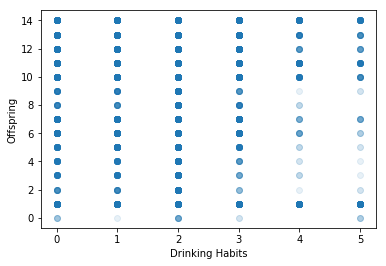

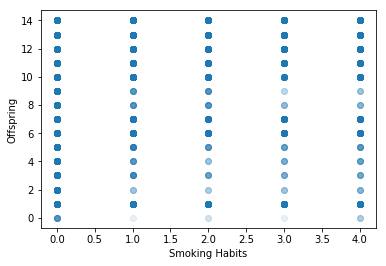

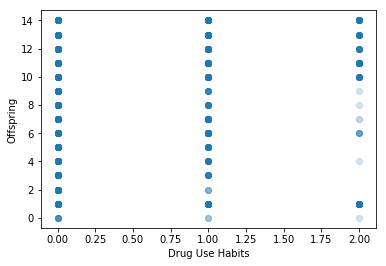

In [41]:
plt.scatter(df['drinks_code'], df['offspring_code'], alpha=0.1)
plt.xlabel('Drinking Habits')
plt.ylabel('Offspring')
plt.show()
plt.scatter(df['smokes_code'], df['offspring_code'], alpha=0.1)
plt.xlabel('Smoking Habits')
plt.ylabel('Offspring')
plt.show()
plt.scatter(df['drugs_code'], df['offspring_code'], alpha=0.1)
plt.xlabel('Drug Use Habits')
plt.ylabel('Offspring')
plt.show()


In [12]:
# K-Nearest Neighbor Regressor: Can you predict offspring (y) from (smoking, drinking, and drugs)x

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
regressor = KNeighborsRegressor(n_neighbors = 2, weights = "distance")
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

[[10.]
 [10.]
 [10.]
 ...
 [10.]
 [ 3.]
 [10.]]


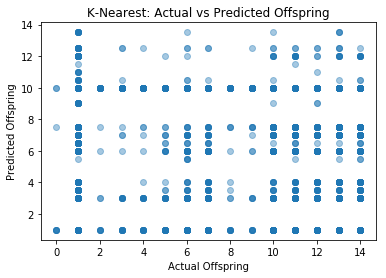

In [15]:
regressor.fit(x_train, y_train)
k_nearest = regressor.predict(x_test)
print(k_nearest)



In [16]:
#Evaluation
print(regressor.score(x_test,y_test))
print(regressor.score(x_train,y_train))


-0.5821071653137004
-0.5562999586593569


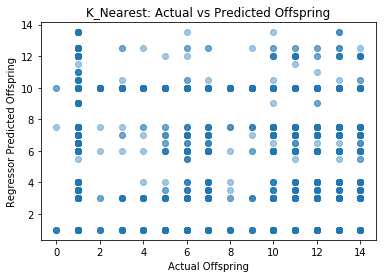

In [17]:
plt.scatter(y_test, k_nearest, alpha=0.4)
plt.xlabel("Actual Offspring")
plt.ylabel("Regressor Predicted Offspring")
plt.title("K_Nearest: Actual vs Predicted Offspring")

plt.show()

In [18]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]


# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
df['essay_combined'] = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

df["essay_len"] = df.essay_combined.apply(lambda x: len(x))
print(df.essay_len.head())



0    2644
1    1453
2    5517
3     477
4     725
Name: essay_len, dtype: int64


In [19]:
#Can we predict sex with essay text word counts?


In [20]:
#map labels onto sex column
sex_mapping = {"m": 2, "f": 1}
df["sex_code"] = df.sex.map(sex_mapping)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

Kclassifier = KNeighborsClassifier(n_neighbors = 5)
training_data = df.essay_len
training_labels = df.sex_code
training_data = training_data.values.reshape(-1, 1)



In [22]:
Kclassifier.fit(training_data, training_labels)
#guess = Kclassifier.predict([[500]])
#print(guess)
df['prediction1'] = Kclassifier.predict(training_data)
print(df.prediction1.value_counts())

2    40894
1    19052
Name: prediction1, dtype: int64


In [23]:

#Find the accuracy, precision, and recall of each model you used, and create graphs showing how they changed. 
#Accuracy is calculated by finding the total number of correctly classified points and dividing by the total number of points.
#Recall measures the percentage of relevant items that your classifier found.
#precision is the number of snow days the algorithm correctly predicted divided by the number of times it predicted there would be a snow day.
#F1 score is the harmonic mean of precision and recall


labels = training_labels
guesses = Kclassifier.predict(training_data)

print(accuracy_score(labels, guesses))
print(recall_score(labels, guesses))
print(precision_score(labels, guesses))
print(f1_score(labels, guesses))

0.6160377673239249
0.4177965750300618
0.5288683602771362
0.46681646551923833


In [24]:
#SVC: can we predict sex from drugs, smoking, and drinking
feature_data = df[['smokes_code', 'drinks_code', 'drugs_code']]
X_train, X_test, Y_train, Y_test = train_test_split(feature_data, df.sex_code, test_size=0.2,random_state=109)

In [25]:
from sklearn import svm
Sclassifier= svm.SVC(kernel='linear') 

Sclassifier.fit(X_train, Y_train)

Y_pred = Sclassifier.predict(X_test)

In [26]:

#Find the accuracy, precision, and recall of each model you used, and create graphs showing how they changed. 
#Accuracy is calculated by finding the total number of correctly classified points and dividing by the total number of points.
#Recall measures the percentage of relevant items that your classifier found.
#precision is the number of snow days the algorithm correctly predicted divided by the number of times it predicted there would be a snow day.
#F1 score is the harmonic mean of precision and recall


answers = Y_test
guesses = Sclassifier.predict(X_test)

#metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

print(accuracy_score(answers, guesses))
print(recall_score(answers, guesses, average = 'weighted'))
print(precision_score(answers, guesses, average = 'weighted'))
print(f1_score(answers, guesses, average = 'weighted'))


0.5962468723936614
0.5962468723936614
0.3555103328392231
0.4454327698147536


/Users/PalackyLLC/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/PalackyLLC/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
Kclassifier = KNeighborsClassifier(n_neighbors = 5)
feature_data = df[['smokes_code', 'drinks_code', 'drugs_code']]
X_train, X_test, Y_train, Y_test = train_test_split(feature_data, df.sex_code, test_size=0.2,random_state=109)

Kclassifier.fit(X_train, Y_train)
Y2_pred = Kclassifier.predict(X_test)



In [28]:
#Accuracy is calculated by finding the total number of correctly classified points and dividing by the total number of points.
#Recall measures the percentage of relevant items that your classifier found.
#precision is the number of snow days the algorithm correctly predicted divided by the number of times it predicted there would be a snow day.
#F1 score is the harmonic mean of precision and recall


answers = Y_test
guesses = Y2_pred

print(accuracy_score(answers, guesses))
print(recall_score(answers, guesses, average = 'weighted'))
print(precision_score(answers, guesses, average = 'weighted'))
print(f1_score(answers, guesses, average = 'weighted'))

0.5756463719766473
0.5756463719766473
0.49380054287564057
0.47123445599445146
